In [83]:
import matplotlib.pyplot as plt
import os, glob
import pandas as pd

In [87]:
dirs = ["evidential", "random", "dropout"]
results_path = "../results/small_mlp"

In [88]:
results_dict = {}
for d in dirs:
    try:
        if "/" in d:
            _d = d.split("/")[-1]
        else:
            _d = d
        results_dict[_d] = pd.concat([
             pd.read_csv(x) for x in glob.glob(os.path.join(results_path, d, "active_train_log_*.csv"))
         ]).drop_duplicates()
    except:
        print(d)

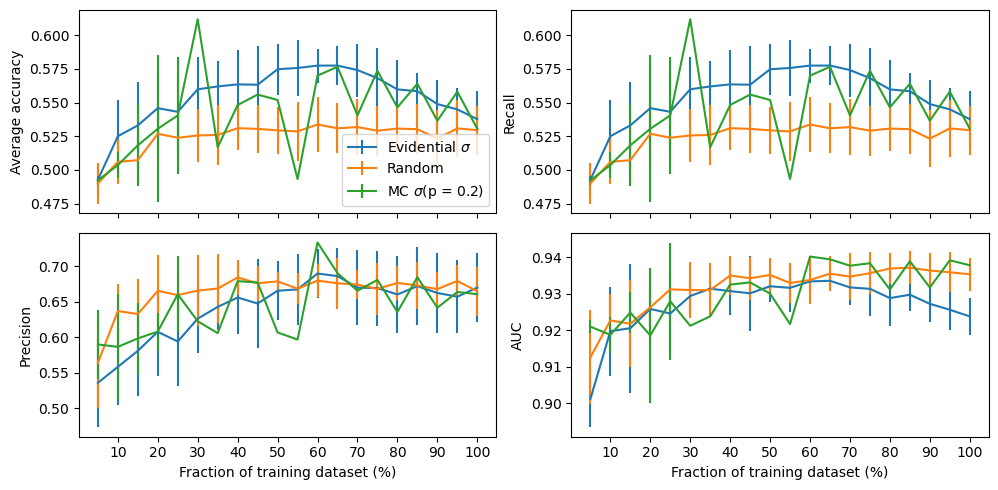

In [89]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5), sharex = "col")#, sharey = "row")

for key in dirs:
    df = results_dict[key].groupby("iteration")
    df_mu, df_std = df.mean(), df.std()
    axs[0][0].errorbar(df_mu.index, df_mu["test_ave_acc"], yerr = df_std["test_ave_acc"])
    axs[1][0].errorbar(df_mu.index, df_mu["test_prec"], yerr = df_std["test_prec"])
    #axs[2][0].errorbar(df_mu.index, df_mu["test_f1"], yerr = df_std["test_f1"])
    
    df = results_dict[key].groupby("iteration")
    df_mu, df_std = df.mean(), df.std()
    axs[0][1].errorbar(df_mu.index, df_mu["test_recall"], yerr = df_std["test_recall"])
    axs[1][1].errorbar(df_mu.index, df_mu["test_auc"], yerr = df_std["test_auc"])
    #axs[2][1].errorbar(df_mu.index, df_mu["test_csi"], yerr = df_std["test_csi"])


axs[1][0].set_xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
axs[1][0].set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
axs[1][1].set_xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
axs[1][1].set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

axs[0][0].set_ylabel("Average accuracy")
axs[1][0].set_ylabel("Precision")

axs[0][1].set_ylabel("Recall")
axs[1][1].set_ylabel("AUC")

_ = [axx.set_xlabel("Fraction of training dataset (%)") for axx in axs[1]]

axs[0][0].legend([r"Evidential $\sigma$", "Random", "MC $\sigma$(p = 0.2)"])
plt.tight_layout()

In [84]:
#results_dict[key]